## Importing Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Load the pre-trained model and compile if necessary

In [2]:
model = load_model('aloe_vera_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Image Preproccesing

In [3]:
# Define image size and class names as per training order
img_height, img_width = 128, 128
class_names = ['Fungal', 'Healthy', 'Rust']  # Ensure these match the class indices used in training

# Function to preprocess a single image
def prepare_image(file_path):
    img = load_img(file_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to match model input
    return img_array


# Function to predict class and confidence for a single image

In [4]:
def predict_image(file_path):
    img_array = prepare_image(file_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]
    return class_names[predicted_class], confidence


In [5]:
# Provide the path of an individual test image to predict its class
test_image_path = 'D:/Projects/Medicinal-Plant-Diseases-Detection/Dataset/Augmented Aloe Vera Dataset/Rust/AloeVeraOriginalRust0014_flipped_261.jpg'
predicted_class, confidence = predict_image(test_image_path)
print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted class: Rust with confidence: 1.00


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


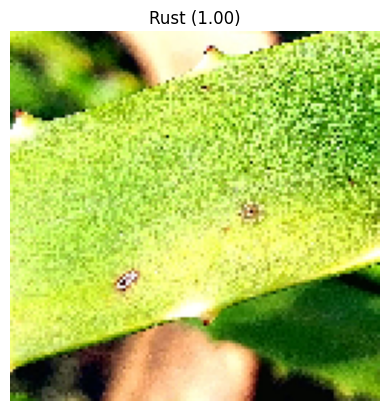

In [6]:
# Function to display the image with its predicted class and confidence
def display_prediction(file_path):
    predicted_class, confidence = predict_image(file_path)
    img = load_img(file_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.title(f"{predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Display a prediction for the test image
display_prediction(test_image_path)
